In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib
import matplotlib.font_manager as fm
import matplotlib.patheffects as path_effects
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix
from sklearn.metrics import f1_score

In [2]:
# 한글 깨짐 방지
import matplotlib
import matplotlib.font_manager as fm
# fm._rebuild()
fm.get_fontconfig_fonts()
font_location = 'C:/Users/ASIA-19/NanumGothic.ttf' # 폰트 파일 이름, 디렉토리 주의
font_name = fm.FontProperties(fname=font_location).get_name()
matplotlib.rc('font', family=font_name)

In [3]:
file = r"D:/work/python/a-truck-accident/data/cleandata_final.xlsx"
df = pd.read_excel(file, sheet_name="Sheet1")

In [4]:
print(df.columns)

Index(['사망', '사고발생시각', '일일 교통량', '일일 교통량 평균', '일일 속도평균', '일일 속도75%',
       '고속도로 교통량', '고속도로별 로드킬', '요일', '제한차량_과적', '제한차량_적불', '화물평균일교통량', '부상자수',
       '사고유형_사람_차_단독', '안전운전불이행', '가해연령대', '교통사고비용', '위험운전행동', '화물_관용',
       '화물_자가용', '화물_영업용', '화물등록_계', '주행거리당 사망수', '시도별_진료비', '연령별_가해진료비',
       '연령별_피해진료비'],
      dtype='object')


In [5]:
# # 기술 속성(descriptive features)
X = df.drop(['사망', '부상자수', '교통사고비용'], axis=1)
# # 대상 속성(target feature)
Y = df['사망']

In [6]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=10)

!pip install lightgbm

In [7]:
# #데이터를 표준화 시킴
# from sklearn.preprocessing import StandardScaler


# #훈련용 뿐만 아니라 테스트용도 같이 

# ss = StandardScaler()
# ss.fit(X_train)
# train_scaled = ss.transform(X_train)
# test_scaled = ss.transform(X_test)

In [8]:
import lightgbm as lgb
# ▶ Hyper parametre setting

In [9]:
d_train = lgb.Dataset (X_train, label = Y_train)
params = {}
params [ 'learning_rate'] = 0.02
params [ 'boosting_type'] = 'gbdt' # GradientBoostingDecisionTree
params ['objective'] = 'binary'
params [ 'metric' ] = 'binary_logloss' # metric for binary-class
params [ 'max_depth'] = 2
params [ 'num_leaves' ] = 4 # 최대 leaves는 2^(max_depth)
params ['seed'] = 23456
# ▶ 학습
clf = lgb.train (params, d_train, 500) # 1000 epocs에서 모델 훈련

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 175, number of negative: 1915
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000245 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1386
[LightGBM] [Info] Number of data points in the train set: 2090, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.083732 -> initscore=-2.392687
[LightGBM] [Info] Start training from score -2.392687
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive

In [10]:
from sklearn.metrics import classification_report

Y_pred_train = clf.predict(X_train)
for i in range(0,len(Y_pred_train)):
    if Y_pred_train[i]>=.3:       # setting threshold to .5
       Y_pred_train[i]=1
    else:
       Y_pred_train[i]=0

Y_pred_test = clf.predict(X_test)
for i in range(0,len(Y_pred_test)):
    if Y_pred_test[i]>=.3:       # setting threshold to .5
       Y_pred_test[i]=1
    else:
       Y_pred_test[i]=0

print(classification_report(Y_train, Y_pred_train))
print(classification_report(Y_test, Y_pred_test))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96      1915
           1       0.74      0.08      0.14       175

    accuracy                           0.92      2090
   macro avg       0.83      0.54      0.55      2090
weighted avg       0.91      0.92      0.89      2090

              precision    recall  f1-score   support

           0       0.93      0.99      0.96       484
           1       0.33      0.05      0.09        39

    accuracy                           0.92       523
   macro avg       0.63      0.52      0.52       523
weighted avg       0.88      0.92      0.89       523



In [11]:
print(pd.Series(Y_pred_test).value_counts())

0.0    517
1.0      6
dtype: int64


In [12]:
# 과적합 문제, Train과 Test set에 성능을 최대한 줄여주는 것이 과적합을 방지
from sklearn.metrics import roc_auc_score

Y_pred_train_proba = clf.predict(X_train)
Y_pred_test_proba = clf.predict(X_test)


roc_score_train = roc_auc_score(Y_train, Y_pred_train_proba)
roc_score_test = roc_auc_score(Y_test, Y_pred_test_proba)

print("roc_score_train :", roc_score_train)
print("roc_score_test :", roc_score_test)

roc_score_train : 0.8660395374860128
roc_score_test : 0.6914335664335663


C:\Users\ASIA-19\AppData\Local\Temp/ipykernel_5044/919672300.py:12: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([0, 1], [0, 1], 'k--', label='Random', color='red')


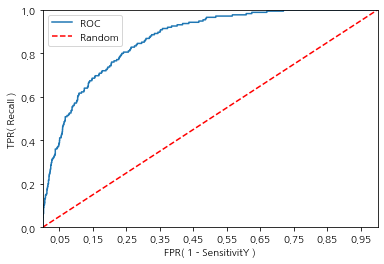

C:\Users\ASIA-19\AppData\Local\Temp/ipykernel_5044/919672300.py:12: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([0, 1], [0, 1], 'k--', label='Random', color='red')


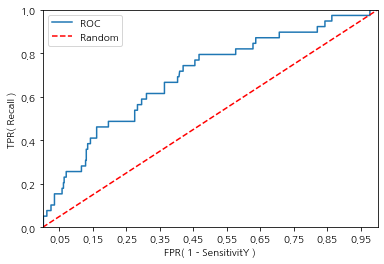

In [13]:
from sklearn.metrics import roc_curve

def roc_curve_plot(Y_test, pred_proba_c1):
    # 임곗값에 따른 FPR, TPR 값을 반환 받음.
    # FPR : 암환자가 아닌 환자를 암환자라고 잘 못 예측한 비율
    # TPR : Recall
    fprs, tprs, thresholds = roc_curve(Y_test, pred_proba_c1)

    # ROC Curve를 plot 곡선으로 그림.
    plt.plot(fprs, tprs, label='ROC')
    # 가운데 대각선 직선을 그림.
    plt.plot([0, 1], [0, 1], 'k--', label='Random', color='red')

    # FPR X 축의 Scale을 0.1 단위로 변경, X,Y 축명 설정등
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))
    plt.xlim(0, 1)
    plt.ylim(0, 1)
    plt.xlabel('FPR( 1 - SensitivitY )')
    plt.ylabel('TPR( Recall )')
    plt.legend()
    plt.show()

roc_curve_plot(Y_train, Y_pred_train_proba)

roc_curve_plot(Y_test, Y_pred_test_proba)

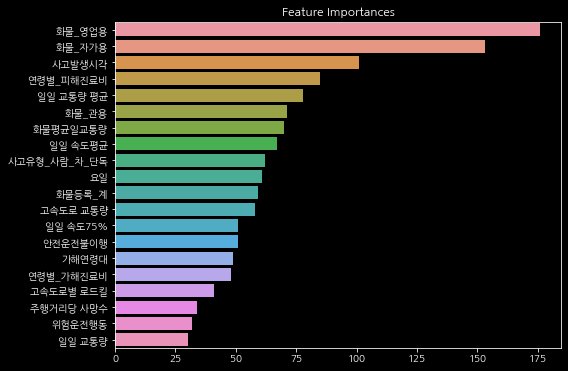

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
# %matplotlib inline
plt.style.use(['dark_background'])

ftr_importances_values = clf.feature_importance() # Randomforest : feature_importance_
ftr_importances = pd.Series(ftr_importances_values, index = X.columns)
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8,6))
plt.title('Feature Importances')
sns.barplot(x=ftr_top20, y=ftr_top20.index)
plt.show()